# Part 3: Data Analysis and Visualization

**Name:** Brayden Uglione

**Date:** 10/10/24

**Exercise:** Project #1, Data Analysis and Visualization

**Purpose:** To analyze survey data from non-computing majors and provide insights that can help increase the number of students taking computing classes at CCM.

## Import Libraries and Load Data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned survey results
df = pd.read_csv('cleaned_survey_results.csv')

## Question 1: Which degree programs are students enrolled in?

This code categorizes the degree programs, counts the number of students in each category, creates a bar chart of the distribution, and prints the enrollment counts for each degree category.

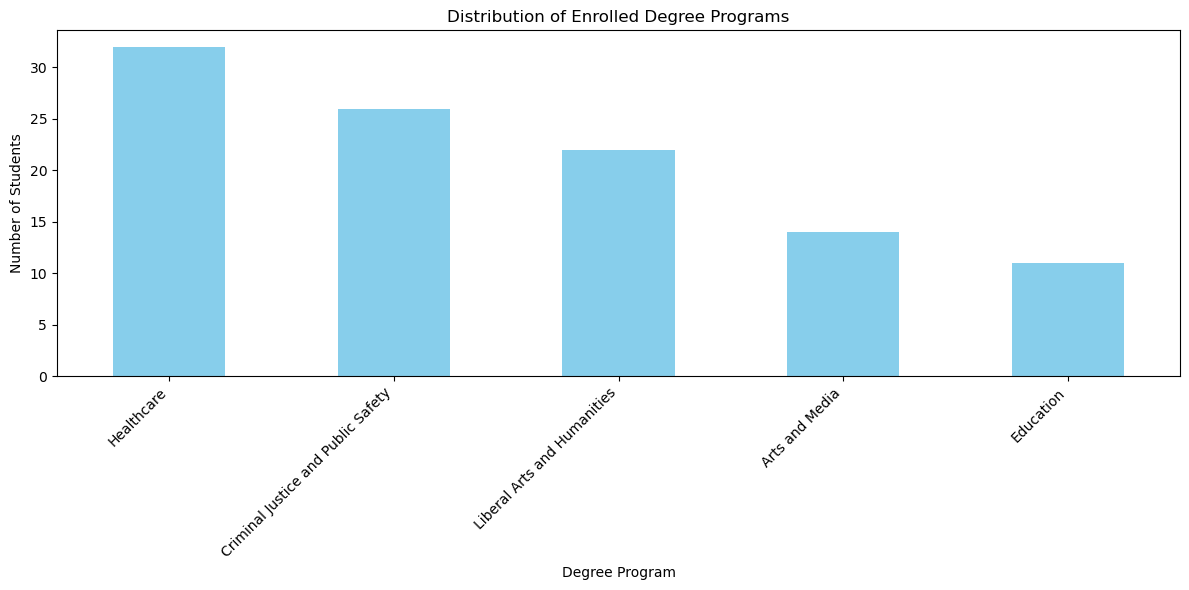

Degree Program Enrollment:
Healthcare: 32
Criminal Justice and Public Safety: 26
Liberal Arts and Humanities: 22
Arts and Media: 14
Education: 11


In [17]:
# Categorize degree programs
# ChatGPT, response to "Categorize these majors into 5 degrees: (all majors from what_degree_program_are_you_currently_enrolled_in copy and pasted in)", OpenAI, October 3, 2024.
def categorize_degree(degree):
    degree = str(degree).lower()
    if 'nursing' in degree or 'radiography' in degree or 'exercise' in degree or 'health' in degree:
        return 'Healthcare'
    elif 'education' in degree or 'child' in degree:
        return 'Education'
    elif 'liberal arts' in degree or 'psychology' in degree or 'language' in degree or 'communication' in degree:
        return 'Liberal Arts and Humanities'
    elif 'criminal justice' in degree or 'fire science' in degree:
        return 'Criminal Justice and Public Safety'
    elif 'theatre' in degree or 'arts' in degree or 'music' in degree:
        return 'Arts and Media'
    else:
        return 'Other'

# Apply the function to the degree program column
df['degree_category'] = df['what_degree_program_are_you_currently_enrolled_in'].apply(categorize_degree)

# Count the number of students in each degree
degree_counts = df['degree_category'].value_counts()

# Plot the degree programs
# ChatGPT, response to "Create a sample Python script using matplotlib to plot a bar chart", OpenAI, October 13, 2024.
plt.figure(figsize=(12, 6))
degree_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Enrolled Degree Programs')
plt.xlabel('Degree Program')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the distribution of enrolled degree programs
print("Degree Program Enrollment:")
for degree, count in degree_counts.items():
    print(f"{degree}: {count}")

## Question 2: What percentage of students heard about CCM through each marketing channel?

The code identifies marketing channel columns, calculates the percentage of positive responses for each channel, formats channel names, creates a bar chart to visualize the results, and prints the effectiveness percentages for each marketing channel.

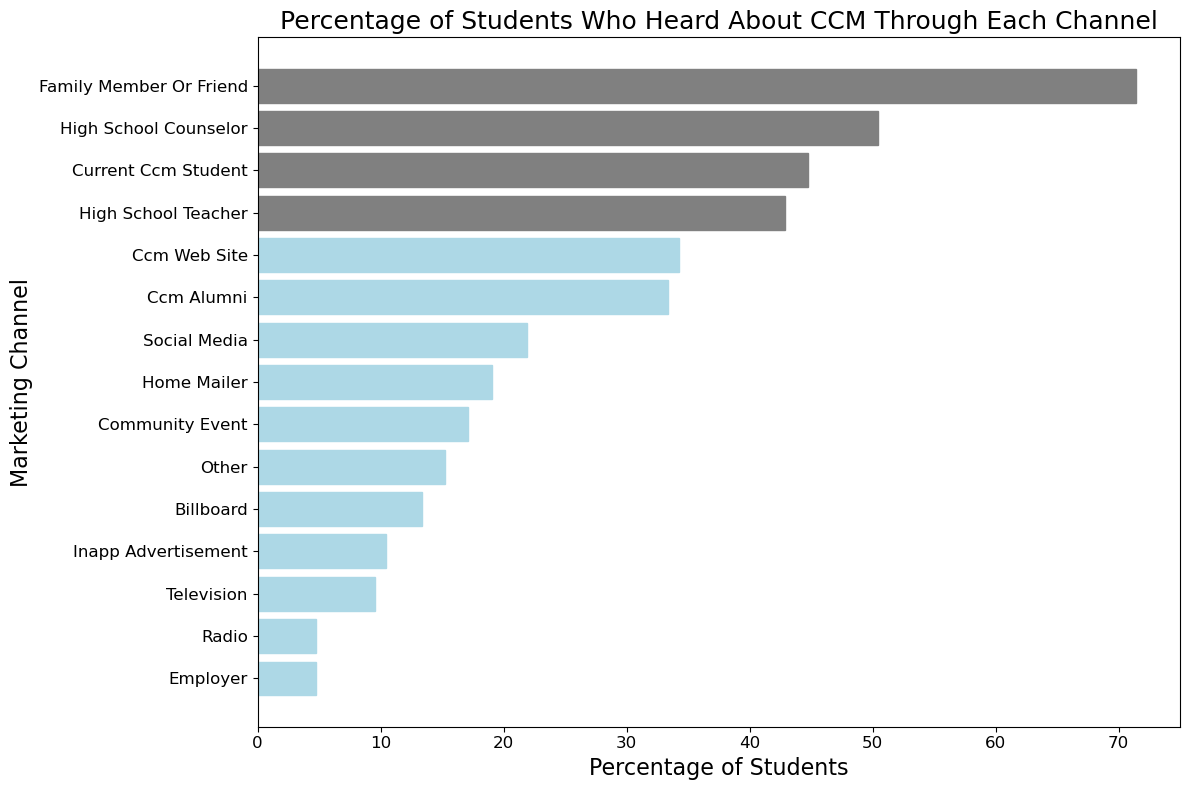

Marketing Channel Effectiveness:
Employer: 4.76%
Radio: 4.76%
Television: 9.52%
Inapp Advertisement: 10.48%
Billboard: 13.33%
Other: 15.24%
Community Event: 17.14%
Home Mailer: 19.05%
Social Media: 21.90%
Ccm Alumni: 33.33%
Ccm Web Site: 34.29%
High School Teacher: 42.86%
Current Ccm Student: 44.76%
High School Counselor: 50.48%
Family Member Or Friend: 71.43%


In [18]:
# Calculate the percentage of students who heard about CCM through each marketing channel
def calculate_percentage(series):
    valid_responses = series.dropna()
    return (valid_responses == 'Yes').sum() / len(valid_responses) * 100 if len(valid_responses) > 0 else 0

# Extract the marketing channel columns
marketing_channels = []
for col in df.columns:
    if col.startswith('how_did_you_hear_about_county_college_of_morris_') and 'check_all_that_apply' not in col:
        marketing_channels.append(col)

# Use calculate function to find the percentage of students who heard about CCM
channel_percentages = df[marketing_channels].apply(calculate_percentage).sort_values(ascending=True)

# Format the columns for plotting
# ChatGPT, response to "How to convert underscores into spaces and make the first letter of each word capitalized in python", OpenAI, October 13, 2024.
formatted_labels = []
for channel in channel_percentages.index:
    formatted_labels.append(channel.replace('how_did_you_hear_about_county_college_of_morris_', '').replace('_', ' ').title())

# Plot the percentage of students who heard about CCM
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(formatted_labels)), channel_percentages.values)

# Color bars based on significance (top 4 channels)
# ChatGPT, response to "How to change color of individual columns in python matplotlib", OpenAI, October 13, 2024.
for i, bar in enumerate(bars):
    if channel_percentages.values[i] < 35:
        bar.set_color('lightblue')  # Light grey for non-significant
    else:
        bar.set_color('grey')  # Steel blue for significant

plt.title('Percentage of Students Who Heard About CCM Through Each Channel', fontsize=18)
plt.xlabel('Percentage of Students', fontsize=16)
plt.ylabel('Marketing Channel', fontsize=16)
plt.yticks(range(len(formatted_labels)), formatted_labels, fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

# Display the percentage of students who heard about CCM
print("Marketing Channel Effectiveness:")
for label, percentage in zip(formatted_labels, channel_percentages):
    print(f"{label}: {percentage:.2f}%")

## Question 3: Which prior computing experiences were most influential in students' decisions to enroll?

This code analyzes and visualizes students' prior computing experiences before applying to County College of Morris.

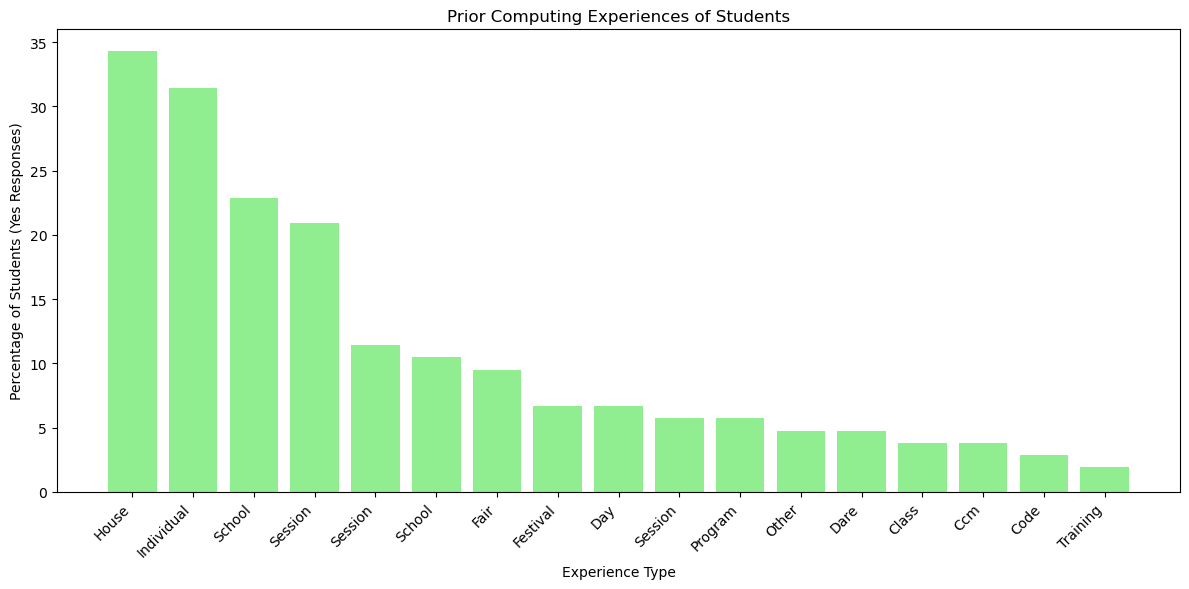

Prior Computing Experiences:
House: 34.29%
Individual: 31.43%
School: 22.86%
Session: 20.95%
Session: 11.43%
School: 10.48%
Fair: 9.52%
Festival: 6.67%
Day: 6.67%
Session: 5.71%
Program: 5.71%
Other: 4.76%
Dare: 4.76%
Class: 3.81%
Ccm: 3.81%
Code: 2.86%
Training: 1.90%


In [19]:
# Calculate the percentage of students who participated in each prior computing experience
experience_columns = []
for col in df.columns:
    if col.startswith('prior_to_applying_to_college_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_andor_with_the_department_of_information_technologies_if_at_all_'):
        experience_columns.append(col)

# Use function to find the percentage of students who participated
experience_percentages = df[experience_columns].apply(calculate_percentage).sort_values(ascending=False)

# Format the columns for plotting
formatted_labels = []
for col in experience_percentages.index:
    label = col.split('_')[-1].replace('_', ' ').title()
    if label == '':
        label = 'Other'
    formatted_labels.append(label)

# Plot the percentage of students who participated
plt.figure(figsize=(12, 6))
plt.bar(range(len(formatted_labels)), experience_percentages.values, color='lightgreen')
plt.title('Prior Computing Experiences of Students')
plt.xlabel('Experience Type')
plt.ylabel('Percentage of Students (Yes Responses)')
plt.xticks(range(len(formatted_labels)), formatted_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the percentage of students who participated
print("Prior Computing Experiences:")
for label, percentage in zip(formatted_labels, experience_percentages):
    print(f"{label}: {percentage:.2f}%")

## Question 4: Is there a correlation between gender and interest level in taking more computing courses?

This code analyzes and visualizes the relationship between gender and interest level in taking more computing courses at County College of Morris.

<Figure size 1000x600 with 0 Axes>

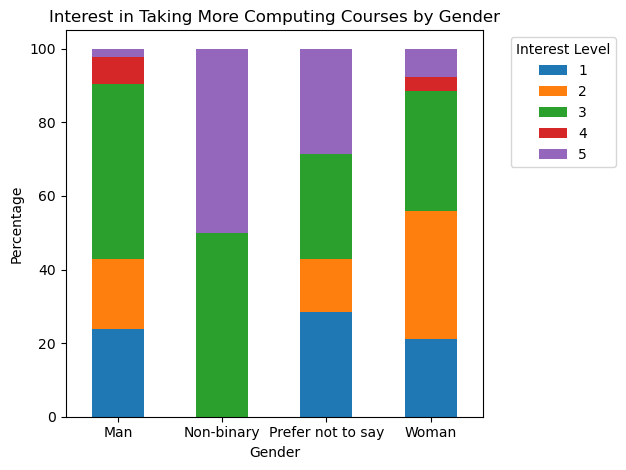

Contingency Table Percentages:
interest_level             1          2          3         4          5
gender                                                                 
Man                23.809524  19.047619  47.619048  7.142857   2.380952
Non-binary          0.000000   0.000000  50.000000  0.000000  50.000000
Prefer not to say  28.571429  14.285714  28.571429  0.000000  28.571429
Woman              21.153846  34.615385  32.692308  3.846154   7.692308

Average Interest Level by Gender:
gender
Man                  2.452381
Non-binary           4.000000
Prefer not to say    2.857143
Woman                2.423077
Name: interest_level, dtype: float64


In [20]:
# Identify columns related to interest in computing courses
interest_column = 'on_a_scale_of_1_to_5_with_1_being_not_at_all_interested_and_5_being_extremely_interested_how_interested_are_you_taking_more_courses_in_computer_science_information_technology_or_game_development'
df['interest_level'] = pd.to_numeric(df[interest_column])
df = df[(df['interest_level'] >= 1) & (df['interest_level'] <= 5) & (df['gender'].notna())]

# Create a box plot to visualize the distribution of interest
# ChatGPT, response to "How to create a contingency table that is compatible with matplotlib in python", OpenAI, October 13, 2024.
contingency_table = pd.crosstab(df['gender'], df['interest_level'])
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Create a stacked bar plot to visualize the interest in computing
# ChatGPT, response to "How to convert a contingency table into a stacked bar plot", OpenAI, October 13, 2024.
plt.figure(figsize=(10, 6))
contingency_table_percentage.plot(kind='bar', stacked=True)
plt.title('Interest in Taking More Computing Courses by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Interest Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print the contingency table percentages and average interest level
print("Contingency Table Percentages:")
print(contingency_table_percentage)

# Calculate the average interest level
average_interest = df.groupby('gender')['interest_level'].mean()
print("\nAverage Interest Level by Gender:")
print(average_interest)